In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import re

### At first let's load the data and check whether it's done correctly

In [2]:
train_data = pd.read_csv("../data/prepared_data/train_data.csv")

In [3]:
train_data.head()

,date,store_number,item_family,items_on_promotion,item_sales,city,state,store_type,store_cluster,oil_price,day_type,holiday_status,holiday_location,holiday_description,is_holiday_transferred,mean_sales_prev_week
0,2013-01-01,1,AUTOMOTIVE,0,0.0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,0.0
1,2013-01-01,1,BABY CARE,0,0.0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,0.0
2,2013-01-01,1,BEAUTY,0,0.0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,0.0
3,2013-01-01,1,BEVERAGES,0,0.0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,0.0
4,2013-01-01,1,BOOKS,0,0.0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,0.0


### Now let's check whether there are some missing values or duplicated rows

In [4]:
train_data.isna().sum()

date                      0
store_number              0
item_family               0
items_on_promotion        0
item_sales                0
city                      0
state                     0
store_type                0
store_cluster             0
oil_price                 0
day_type                  0
holiday_status            0
holiday_location          0
holiday_description       0
is_holiday_transferred    0
mean_sales_prev_week      0
dtype: int64

In [5]:
train_data.duplicated().sum()

0

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400710 entries, 0 to 2400709
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   date                    object 
 1   store_number            int64  
 2   item_family             object 
 3   items_on_promotion      int64  
 4   item_sales              float64
 5   city                    object 
 6   state                   object 
 7   store_type              object 
 8   store_cluster           int64  
 9   oil_price               float64
 10  day_type                object 
 11  holiday_status          object 
 12  holiday_location        object 
 13  holiday_description     object 
 14  is_holiday_transferred  bool   
 15  mean_sales_prev_week    float64
dtypes: bool(1), float64(3), int64(3), object(9)
memory usage: 277.0+ MB


In [7]:
len(train_data)

2400710

### Now let's perform some necessary data preparation of the train part for EDA

In [8]:
train_data.head()

,date,store_number,item_family,items_on_promotion,item_sales,city,state,store_type,store_cluster,oil_price,day_type,holiday_status,holiday_location,holiday_description,is_holiday_transferred,mean_sales_prev_week
0,2013-01-01,1,AUTOMOTIVE,0,0.0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,0.0
1,2013-01-01,1,BABY CARE,0,0.0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,0.0
2,2013-01-01,1,BEAUTY,0,0.0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,0.0
3,2013-01-01,1,BEVERAGES,0,0.0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,0.0
4,2013-01-01,1,BOOKS,0,0.0,Quito,Pichincha,D,13,93.14,Holiday,National,Ecuador,Primer dia del ano,False,0.0


In [9]:
train_data.tail()

,date,store_number,item_family,items_on_promotion,item_sales,city,state,store_type,store_cluster,oil_price,day_type,holiday_status,holiday_location,holiday_description,is_holiday_transferred,mean_sales_prev_week
2400705,2016-09-12,19,LINGERIE,0,26.000,Guaranda,Bolivar,C,15,46.28,Not holiday,Not holiday,Not holiday,Not holiday,False,13.142857
2400706,2016-09-12,19,"LIQUOR,WINE,BEER",0,9.000,Guaranda,Bolivar,C,15,46.28,Not holiday,Not holiday,Not holiday,Not holiday,False,22.714286
2400707,2016-09-12,19,MAGAZINES,0,1.000,Guaranda,Bolivar,C,15,46.28,Not holiday,Not holiday,Not holiday,Not holiday,False,2.857143
2400708,2016-09-12,19,MEATS,0,170.509,Guaranda,Bolivar,C,15,46.28,Not holiday,Not holiday,Not holiday,Not holiday,False,129.377001
2400709,2016-09-12,19,PERSONAL CARE,8,181.000,Guaranda,Bolivar,C,15,46.28,Not holiday,Not holiday,Not holiday,Not holiday,False,198.428571


In [10]:
train_data.index.value_counts()

0          1
1600485    1
1600469    1
1600470    1
1600471    1
          ..
800237     1
800238     1
800239     1
800240     1
2400709    1
Name: count, Length: 2400710, dtype: int64

### We see that the data is prepared correctly and now let's search for some interesting patterns in it (i.e EDA)

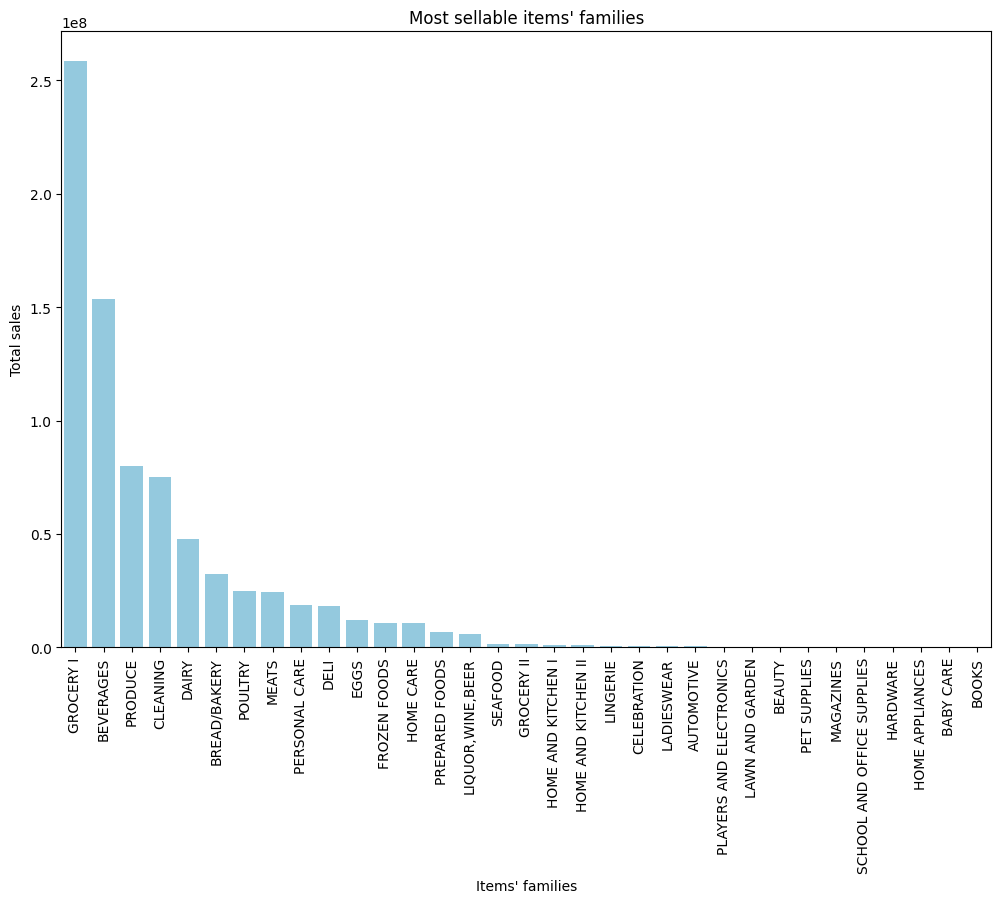

In [11]:
item_families_sales_summary = train_data.groupby('item_family')['item_sales'].sum().reset_index().sort_values(by='item_sales', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=item_families_sales_summary, x='item_family', y='item_sales', color='skyblue')
plt.xlabel("Items' families")
plt.ylabel("Total sales")
plt.title("Most sellable items' families")
plt.xticks(rotation=90)  
plt.show()

#### Grocery, Beverages, Produce, Cleaning and Dairy – top 5 most sellable items' families

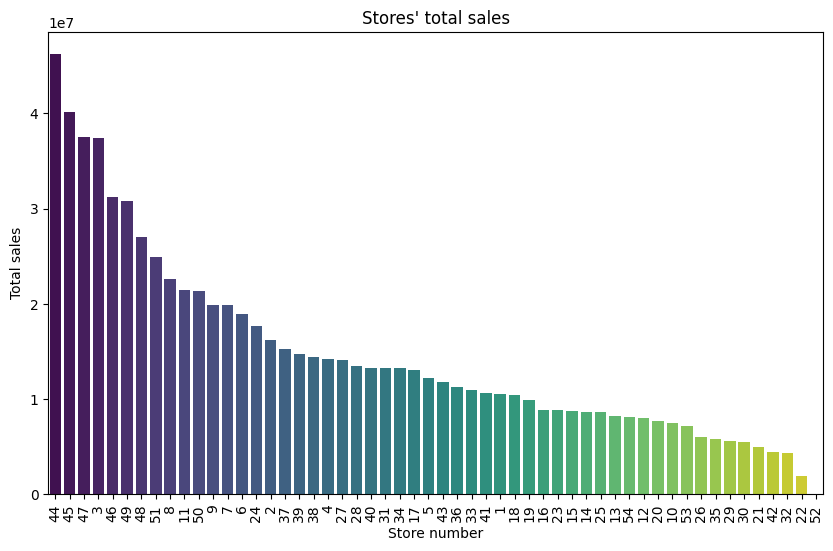

In [12]:
store_sales_summary = train_data.groupby('store_number')['item_sales'].sum().reset_index().sort_values(by='item_sales', ascending=False)
store_sales_summary['store_number'] = pd.Categorical(store_sales_summary['store_number'], 
                                                     categories=store_sales_summary['store_number'], 
                                                     ordered=True)
plt.figure(figsize=(10, 6))
sns.barplot(data=store_sales_summary, x='store_number', y='item_sales', hue='store_number', dodge=False, palette='viridis', legend=False)
plt.xlabel('Store number')
plt.ylabel('Total sales')
plt.title("Stores' total sales")
plt.xticks(rotation=90)
plt.show()

#### There are 11 stores (3, 8, 11, 44, 45, 46, 47, 48, 49, 50, 51) with at least 20 million total sales. Let's check their locations

In [13]:
train_data[train_data['store_number'].isin([3, 8, 11, 44, 45, 46, 47, 48, 49, 50, 51])]['city'].value_counts()

city
Quito        355608
Cayambe       44484
Ambato        44451
Guayaquil     44451
Name: count, dtype: int64

### Let's see average sales among all shops and dates

In [14]:
np.round(train_data['item_sales'].mean(), 2)

328.24

### Now let's see average sales depending on store type and store cluster

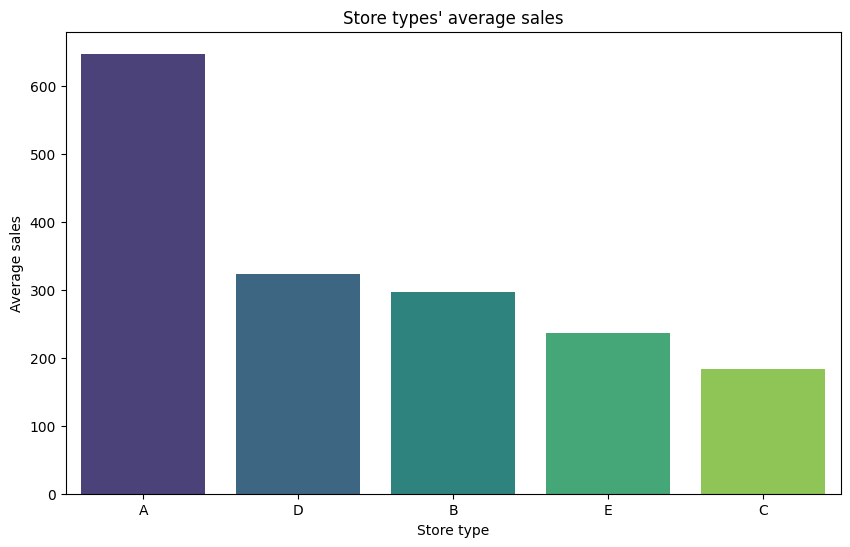

In [15]:
store_type_sales_summary = train_data.groupby('store_type')['item_sales'].mean().reset_index().sort_values(by='item_sales', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=store_type_sales_summary, x='store_type', y='item_sales', hue='store_type', dodge=False, palette='viridis', legend=False)
plt.xlabel('Store type')
plt.ylabel('Average sales')
plt.title("Store types' average sales")
plt.xticks()
plt.show()

#### Stores of type A completely dominate over other stores' types. Its average sales are at least twice higher than any other type's

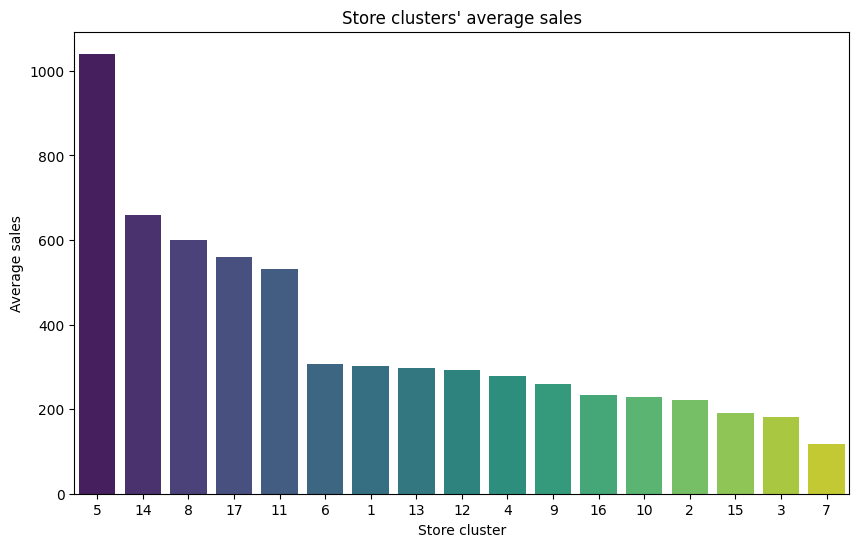

In [16]:
store_cluster_sales_summary = train_data.groupby('store_cluster')['item_sales'].mean().reset_index().sort_values(by='item_sales', ascending=False)
store_cluster_sales_summary['store_cluster'] = pd.Categorical(store_cluster_sales_summary['store_cluster'], 
                                                     categories=store_cluster_sales_summary['store_cluster'], 
                                                     ordered=True)
plt.figure(figsize=(10, 6))
sns.barplot(data=store_cluster_sales_summary, x='store_cluster', y='item_sales', hue='store_cluster', dodge=False, palette='viridis', legend=False)
plt.xlabel('Store cluster')
plt.ylabel('Average sales')
plt.title("Store clusters' average sales")
plt.xticks()
plt.show()

#### There's a slightly different situation with store clusters. There are 5 among them (5, 8, 11, 14, 17) with each's average sales 530+ while others' average sales are <307

### Now let's see average sales for every city and state

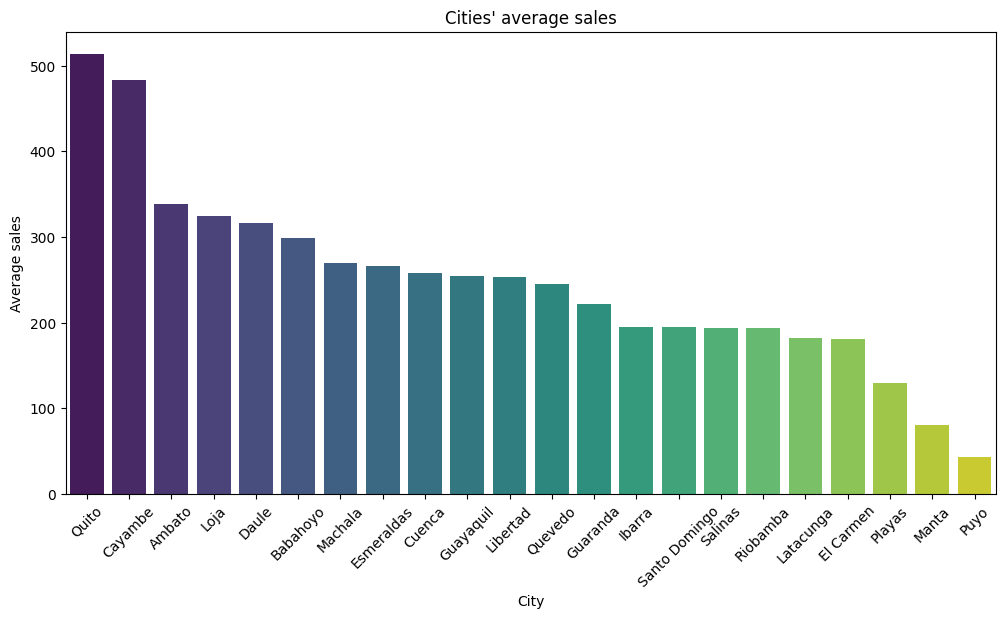

In [17]:
cities_sales_summary = train_data.groupby('city')['item_sales'].mean().reset_index().sort_values(by='item_sales', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=cities_sales_summary, x='city', y='item_sales', hue='city', dodge=False, palette='viridis', legend=False)
plt.xlabel('City')
plt.ylabel('Average sales')
plt.title("Cities' average sales")
plt.xticks(rotation=45)
plt.show()

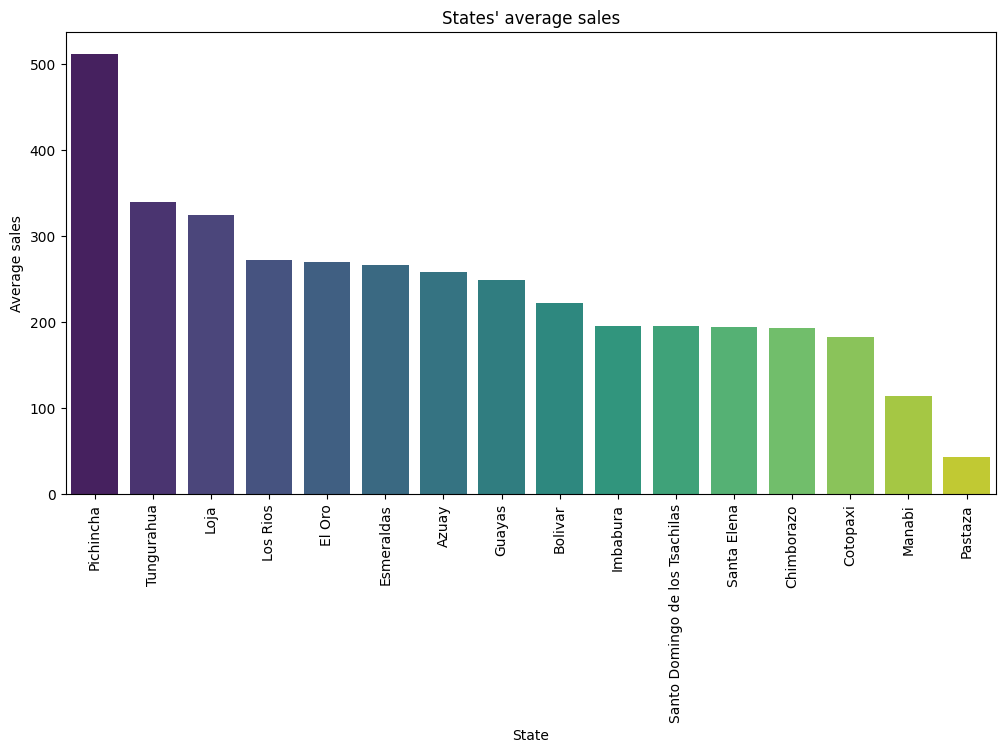

In [18]:
states_sales_summary = train_data.groupby('state')['item_sales'].mean().reset_index().sort_values(by='item_sales', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=states_sales_summary, x='state', y='item_sales', hue='state', dodge=False, palette='viridis', legend=False)
plt.xlabel('State')
plt.ylabel('Average sales')
plt.title("States' average sales")
plt.xticks(rotation=90)
plt.show()

#### There are 5 cities (Quito, Cayambe, Manta, Puyo, Playas) whose average sales stand out (First 2 are much higher than the mean number, last 3 are much lower).

#### As for states, the main one here is Pichincha that dominates over others.

### Now let's see total sales for every month and the oil prices' dependency on time

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400710 entries, 0 to 2400709
Data columns (total 16 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   date                    object 
 1   store_number            int64  
 2   item_family             object 
 3   items_on_promotion      int64  
 4   item_sales              float64
 5   city                    object 
 6   state                   object 
 7   store_type              object 
 8   store_cluster           int64  
 9   oil_price               float64
 10  day_type                object 
 11  holiday_status          object 
 12  holiday_location        object 
 13  holiday_description     object 
 14  is_holiday_transferred  bool   
 15  mean_sales_prev_week    float64
dtypes: bool(1), float64(3), int64(3), object(9)
memory usage: 277.0+ MB


In [20]:
train_data['year_month'] = pd.to_datetime(train_data['date']).dt.to_period('M')
monthly_sales_summary = train_data.groupby('year_month')['item_sales'].mean().reset_index()
monthly_sales_summary['year_month'] = monthly_sales_summary['year_month'].dt.to_timestamp()

monthly_oil_price_summary = train_data.groupby('year_month')['oil_price'].mean().reset_index()
monthly_oil_price_summary['year_month'] = monthly_oil_price_summary['year_month'].dt.to_timestamp()

fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(
    go.Scatter(x=monthly_sales_summary['year_month'], y=monthly_sales_summary['item_sales'], name='Average Sales', line=dict(color='blue')),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=monthly_oil_price_summary['year_month'], y=monthly_oil_price_summary['oil_price'], name='Mean Oil Price', line=dict(color='black')),
    secondary_y=True,
)

fig.update_layout(
    title_text='Average Sales and Mean Oil Prices per Month',
    xaxis_title='Month',
)

fig.update_yaxes(title_text='Average Sales', secondary_y=False)
fig.update_yaxes(title_text='Mean Oil Price', secondary_y=True)

fig.show()

#### As you can see the sales are jumping very hard, difficult to see a distinct trend or seasonality except for the December's prices rising 

#### There are obviously 2 double oil price losses within just 6 months (July 2014 - January 2015 and June 2015 - February 2016)

### Now let's see mean sales for all day types

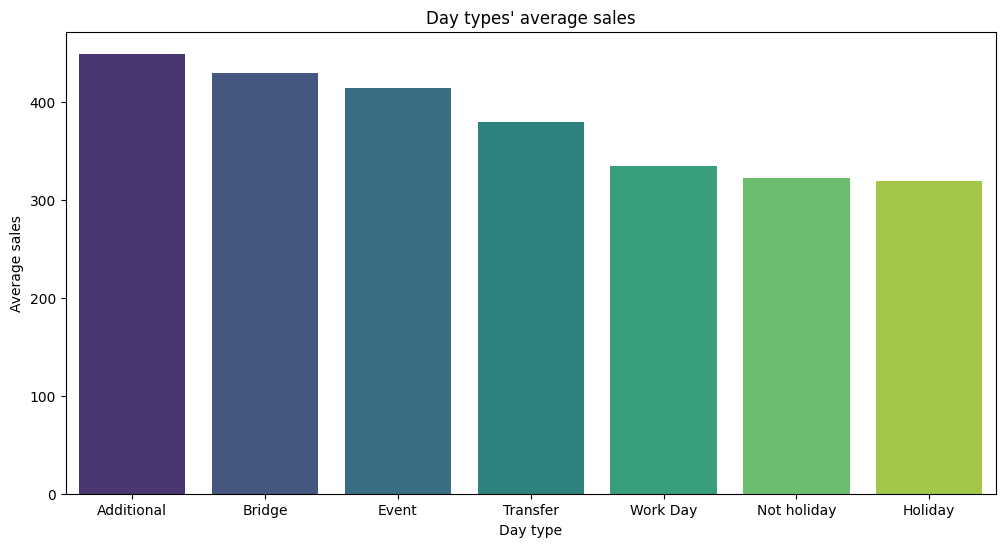

In [21]:
day_types_sales_summary = train_data.groupby('day_type')['item_sales'].mean().reset_index().sort_values(by='item_sales', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=day_types_sales_summary, x='day_type', y='item_sales', hue='day_type', dodge=False, palette='viridis', legend=False)
plt.xlabel('Day type')
plt.ylabel('Average sales')
plt.title("Day types' average sales")
plt.show()

#### It's visible that average sales are slightly higher on "special" non-working days (Additional, Bridge, Transfer holidays or days with events)

### Now let's check sales depending on holidays' features

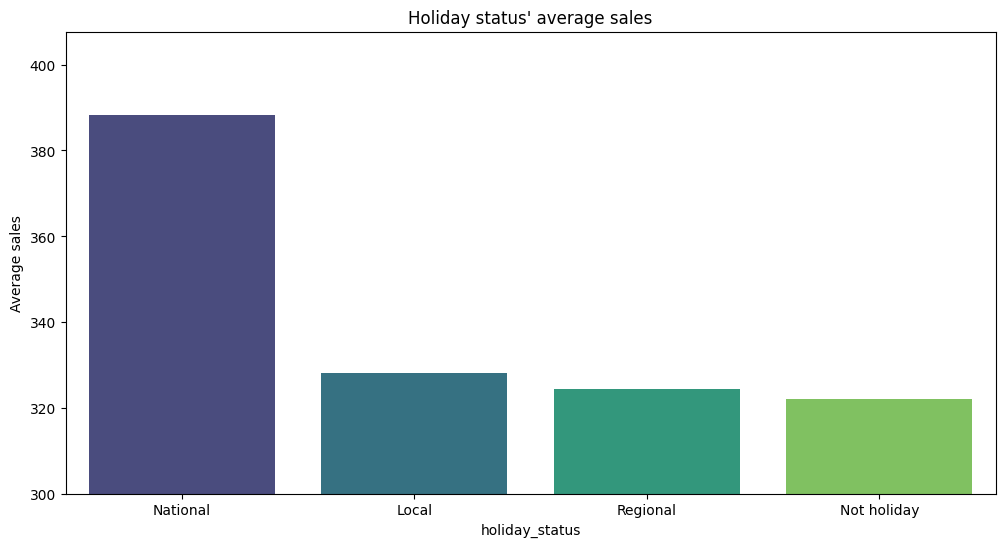

In [22]:
holiday_status_sales_summary = train_data.groupby('holiday_status')['item_sales'].mean().reset_index().sort_values(by='item_sales', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=holiday_status_sales_summary, x='holiday_status', y='item_sales', hue='holiday_status', dodge=False, palette='viridis', legend=False)
plt.xlabel('holiday_status')
plt.ylabel('Average sales')
plt.title("Holiday status' average sales")
plt.ylim(300)
plt.show()

#### As you can see average sales are 20% higher on those holidays which are National ones, while for other types of holidays(Local, Regional) they are almost as on usual days

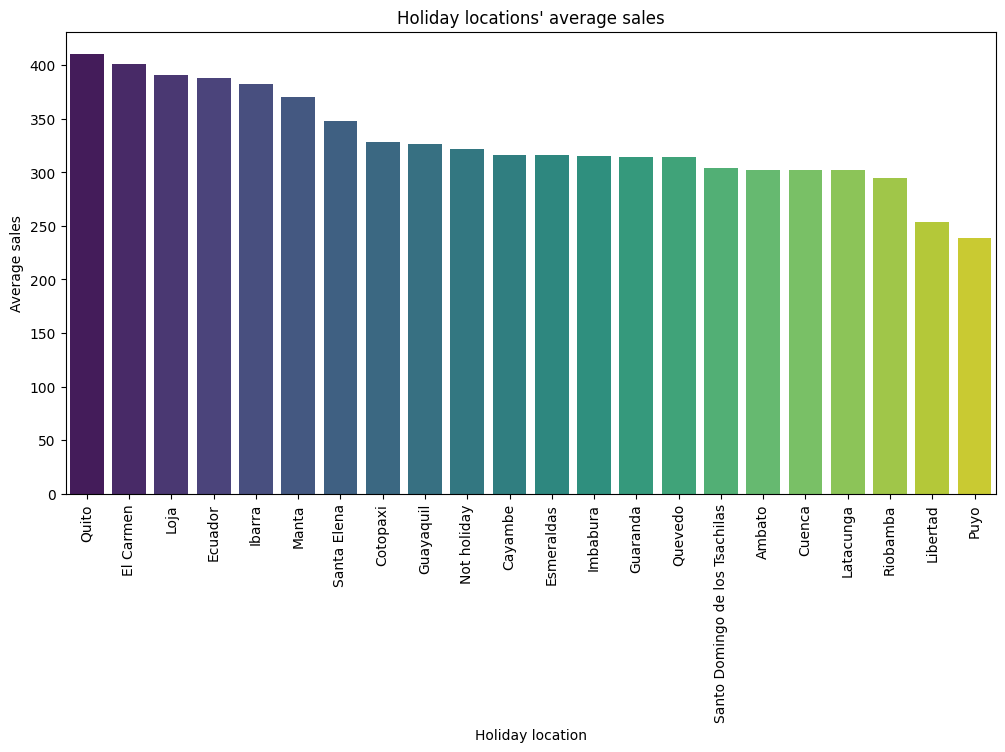

In [23]:
holiday_location_sales_summary = train_data.groupby('holiday_location')['item_sales'].mean().reset_index().sort_values(by='item_sales', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=holiday_location_sales_summary, x='holiday_location', y='item_sales', hue='holiday_location', dodge=False, palette='viridis', legend=False)
plt.xlabel('Holiday location')
plt.ylabel('Average sales')
plt.title("Holiday locations' average sales")
plt.xticks(rotation=90)
plt.show()

#### It's visible that average sales are distributed more or less uniformly among different holidays' locations

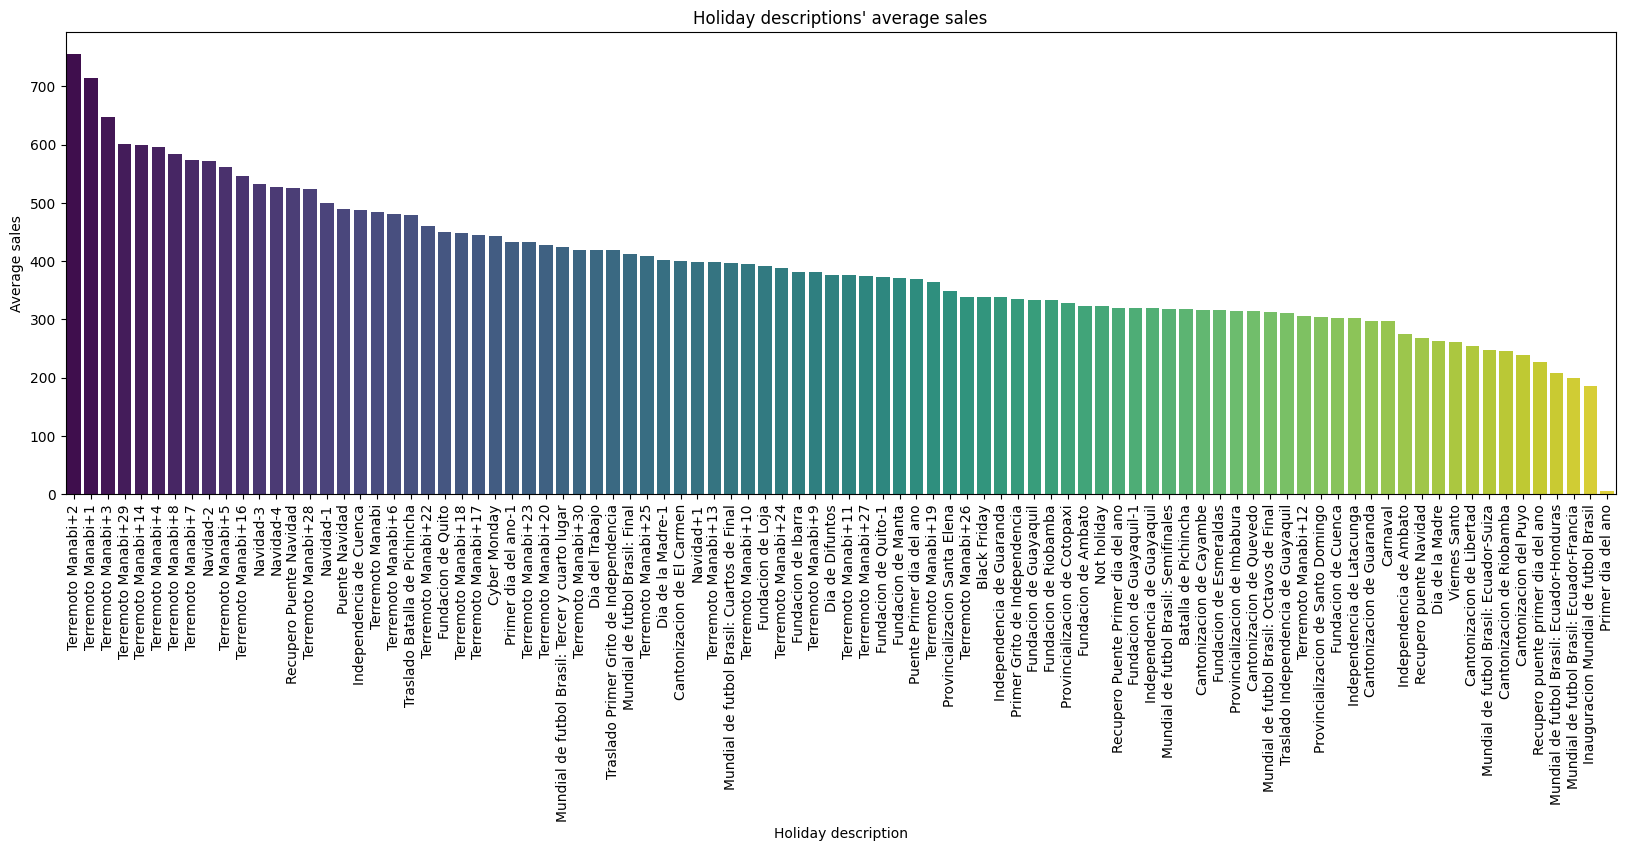

In [24]:
holiday_description_sales_summary = train_data.groupby('holiday_description')['item_sales'].mean().reset_index().sort_values(by='item_sales', ascending=False)

plt.figure(figsize=(20, 6))
sns.barplot(data=holiday_description_sales_summary, x='holiday_description', y='item_sales', hue='holiday_description', dodge=False, palette='viridis', legend=False)
plt.xlabel('Holiday description')
plt.ylabel('Average sales')
plt.title("Holiday descriptions' average sales")
plt.xticks(rotation=90)
plt.show()

#### There was an earthquake in Equador on April 16, 2016 that affected sales. As you can see, sales rose up significantly within first days after the catastrophe (Terremoto Manabi +n columns where n means number of days passed after the earthquake)


### Now let's vizualize data for such days only

/var/folders/sv/rfynv7hs7_ndkp9bwt1tr_t40000gn/T/ipykernel_37602/2058009556.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



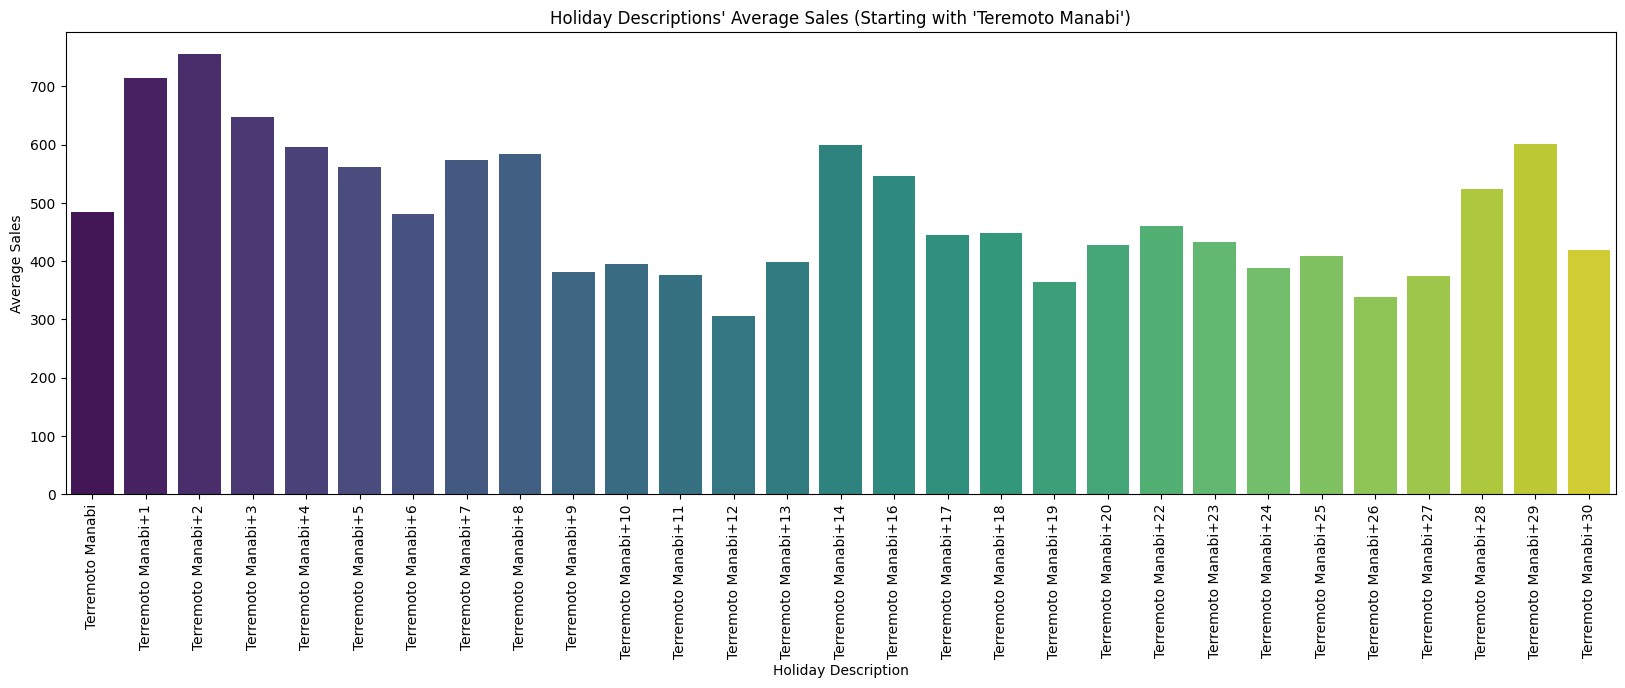

In [25]:
holiday_description_sales_summary = train_data.groupby('holiday_description')['item_sales'].mean().reset_index()
filtered_summary = holiday_description_sales_summary[holiday_description_sales_summary['holiday_description'].str.startswith('Terremoto Manabi')]

def extract_number(description):
    match = re.search(r'\d+', description)
    if match:
        return int(match.group())
    else:
        return 0  

filtered_summary['n'] = filtered_summary['holiday_description'].apply(extract_number)
filtered_summary = filtered_summary.sort_values(by='n')

plt.figure(figsize=(20, 6))
sns.barplot(data=filtered_summary, x='holiday_description', y='item_sales', hue='holiday_description', dodge=False, palette='viridis', legend=False)
plt.xlabel('Holiday Description')
plt.ylabel('Average Sales')
plt.title("Holiday Descriptions' Average Sales (Starting with 'Teremoto Manabi')")
plt.xticks(rotation=90)
plt.show()

In [26]:
train_data['year_month'] = pd.to_datetime(train_data['date']).dt.to_period('M')

random_pairs = train_data[['store_number', 'item_family']].drop_duplicates().sample(n=20, random_state=45)

fig = go.Figure()

for _, (store_number, item_family) in random_pairs.iterrows():
    filtered_data = train_data[(train_data['store_number'] == store_number) & (train_data['item_family'] == item_family)]    
    monthly_sales_summary = filtered_data.groupby('year_month')['item_sales'].mean().reset_index()
    monthly_sales_summary['year_month'] = monthly_sales_summary['year_month'].dt.to_timestamp()
    
    fig.add_trace(go.Scatter(x=monthly_sales_summary['year_month'], y=monthly_sales_summary['item_sales'], 
                             mode='lines', name=f'Store {store_number}, Family {item_family}'))

fig.update_layout(title='Average Sales per Month for Random Store and Item Family Pairs',
                  xaxis_title='Month',
                  yaxis_title='Average Sales',
                  template='plotly')

fig.show()

#### It's clear that the behavior of different time series varies from one to another pretty much, hardly can we find some common trend for them

### Main insights from the Exploratory Data Analysis:

– Grocery, Beverages, Produce, Cleaning and Dairy - TOP 5 most sellable item families among all

– Sales may vary greatly depending on shops' characteristics (type, cluster) and locations (city, state)

– The type of the day (e.g Additional holiday) and its status (e.g. National holidays) influece stores' sales either

– Some other actions uncluding unexpected ones may also have an impact on the sales (e.g earthquake on April 16, 2016 or oil prices falling)

### According to all infromation we've got from the EDA we decided to implement some new features to our dataset:

– is_during_oil_prices_falling

– is_popular_store

– is_popular_cluster

– is_non_popular_cluster

– is_special_non_working_day

– is_national_holiday

– is_state_pichincha

– is_state_manabi_or_pastaza

– is_store_type_A

– is_city_quito_or_cayambe

– is_city_manta_or_puyo

– number_of_days_since_earthquake

### Now let's write the fuction for automatic selection of outstanding items

In [27]:
def select_outstanding_items(data, min_percent_falling):
    min_percent_falling /= 100
    outstanding_items = []
    previous_sales = None
    for index, row in data.iterrows():
        current_sales = row['item_sales']
        if previous_sales is not None and current_sales <= (1 - min_percent_falling) * previous_sales:
            break
        outstanding_items.append(row[data.columns[0]])
        previous_sales = current_sales
    return outstanding_items

In [28]:
select_outstanding_items(holiday_status_sales_summary, 10)

['National']

In [29]:
select_outstanding_items(day_types_sales_summary, 10)

['Additional', 'Bridge', 'Event', 'Transfer']

In [30]:
select_outstanding_items(cities_sales_summary, 27)

['Quito', 'Cayambe']

In [31]:
select_outstanding_items(states_sales_summary, 30)

['Pichincha']

In [32]:
select_outstanding_items(store_cluster_sales_summary, 40)

[5.0, 14.0, 8.0, 17.0, 11.0]